<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Assignment-#9-." data-toc-modified-id="Assignment-#9-.-1">Assignment #9 .</a></span><ul class="toc-item"><li><span><a href="#Time-series-analysis" data-toc-modified-id="Time-series-analysis-1.1">Time series analysis</a></span></li><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-1.2">Data preparation</a></span></li><li><span><a href="#Predicting-with-FB-Prophet" data-toc-modified-id="Predicting-with-FB-Prophet-1.3">Predicting with FB Prophet</a></span><ul class="toc-item"><li><span><a href="#Question-1:-What-is-the-prediction-for-1st-of-January-17-00:00:00?" data-toc-modified-id="Question-1:-What-is-the-prediction-for-1st-of-January-17-00:00:00?-1.3.1"><font color="red">Question 1:</font> What is the prediction for 1st of January 17 00:00:00?</a></span></li><li><span><a href="#Question-2:-What-is-MAPE-equal-to?" data-toc-modified-id="Question-2:-What-is-MAPE-equal-to?-1.3.2"><font color="red">Question 2:</font> What is MAPE equal to?</a></span></li><li><span><a href="#Question-3:-What-is-MAE-equal-to?" data-toc-modified-id="Question-3:-What-is-MAE-equal-to?-1.3.3"><font color="red">Question 3:</font> What is MAE equal to?</a></span></li></ul></li><li><span><a href="#Predicting-with-ARIMA" data-toc-modified-id="Predicting-with-ARIMA-1.4">Predicting with ARIMA</a></span><ul class="toc-item"><li><span><a href="#Question-4:-What's-the-stationarity?" data-toc-modified-id="Question-4:-What's-the-stationarity?-1.4.1"><font color="red">Question 4:</font> What's the stationarity?</a></span></li><li><span><a href="#Question-5:-Best-hyperparameters-before-Box-Cox-transformation?" data-toc-modified-id="Question-5:-Best-hyperparameters-before-Box-Cox-transformation?-1.4.2"><font color="red">Question 5:</font> Best hyperparameters before Box-Cox transformation?</a></span></li><li><span><a href="#Question-6:-Best-hyperparameters-after-Box-Cox-transformation?" data-toc-modified-id="Question-6:-Best-hyperparameters-after-Box-Cox-transformation?-1.4.3"><font color="red">Question 6:</font> Best hyperparameters after Box-Cox transformation?</a></span></li><li><span><a href="#Question-7:-Draw-final-prediction-and-historical-data" data-toc-modified-id="Question-7:-Draw-final-prediction-and-historical-data-1.4.4"><font color="red">Question 7:</font> Draw final prediction and historical data</a></span></li></ul></li></ul></li></ul></div>

<center>
<img src="https://habrastorage.org/files/fd4/502/43d/fd450243dd604b81b9713213a247aa20.jpg">
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 
<center>Author: [Mariya Mansurova](https://www.linkedin.com/in/mariya-mansurova-04070982/), analyst & developer in Yandex.Metrics team. <br>Translated by [Ivan Zakharov](https://www.linkedin.com/in/ivan-zakharov/), ML enthusiast.
<br>All content is distributed under the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license.

# Assignment #9 . 
## Time series analysis

<font color='red'>Fill cells marked with "Your code here" and write answer below question after text "Type your answer here:"
    </font>    

In [36]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go
import requests

from plotly import __version__
print(__version__) # need 1.9.0 or greater
init_notebook_mode(connected = True)


def plotly_df(df, title = ''):
    data = []
    
    for column in df.columns:
        trace = go.Scatter(
            x = df.index,
            y = df[column],
            mode = 'lines',
            name = column
        )
        data.append(trace)
    
    layout = dict(title = title)
    fig = dict(data = data, layout = layout)
    iplot(fig, show_link=False)

4.5.2


## Data preparation

In [2]:
df = pd.read_csv('hour_online.csv')
df = df[df['Users'] != 0]
df.head()

,Time,Users
0,1/1/17 0:00,34002
1,1/1/17 1:00,37947
2,1/1/17 2:00,41517
3,1/1/17 3:00,44476
4,1/1/17 4:00,46234


In [3]:
df.shape

(2616, 2)

## Predicting with FB Prophet
We will train at first 5 months and predict the number of trips for June.

In [4]:
df.Time = pd.to_datetime(df.Time)


In [5]:
plotly_df(df.set_index('Time')[["Users"]])

In [6]:
from fbprophet import Prophet

In [7]:
predictions = 30

df.columns = ['ds', 'y']
df.tail()

,ds,y
2620,2017-04-20 05:00:00,34833
2621,2017-04-20 06:00:00,35932
2622,2017-04-20 07:00:00,38418
2623,2017-04-20 08:00:00,40238
2624,2017-04-20 09:00:00,40763


In [8]:
train_df = df[:-predictions].copy()

In [9]:
m = Prophet()
m.fit(train_df);

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [10]:
future = m.make_future_dataframe(periods=predictions, freq = 'H')
future.tail()

,ds
2611,2017-04-20 05:00:00
2612,2017-04-20 06:00:00
2613,2017-04-20 07:00:00
2614,2017-04-20 08:00:00
2615,2017-04-20 09:00:00


In [11]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2611,2017-04-20 05:00:00,35253.274403,37544.991920,48677.760489,35249.215596,35260.601887,7407.589125,7407.589125,7407.589125,8789.200938,8789.200938,8789.200938,-1381.611814,-1381.611814,-1381.611814,0.0,0.0,0.0,42660.863528
2612,2017-04-20 06:00:00,35261.664859,39956.593083,50949.461351,35254.823378,35272.495862,10100.643101,10100.643101,10100.643101,11418.686893,11418.686893,11418.686893,-1318.043792,-1318.043792,-1318.043792,0.0,0.0,0.0,45362.307960
2613,2017-04-20 07:00:00,35270.055315,41701.029591,52398.058600,35259.956366,35287.356977,11951.850027,11951.850027,11951.850027,13203.923188,13203.923188,13203.923188,-1252.073161,-1252.073161,-1252.073161,0.0,0.0,0.0,47221.905342
2614,2017-04-20 08:00:00,35278.445770,43457.189826,54533.653612,35265.673941,35304.052552,13555.100958,13555.100958,13555.100958,14739.017234,14739.017234,14739.017234,-1183.916276,-1183.916276,-1183.916276,0.0,0.0,0.0,48833.546728
2615,2017-04-20 09:00:00,35286.836226,44506.807750,56117.555481,35267.142912,35319.706054,14841.183345,14841.183345,14841.183345,15954.965920,15954.965920,15954.965920,-1113.782575,-1113.782575,-1113.782575,0.0,0.0,0.0,50128.019571


### <font color='red'>Question 1:</font> What is the prediction for 1st of January 17 00:00:00?

What is the prediction of the number of views of the wiki page on 1st of January 17? Round to the nearest integer.

- Type your answer here: **44013**


In [17]:
# You code here
forecast.loc[forecast['ds'] == '2017-01-01 00:00:00']

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01,44012.939324,32939.306736,44281.469908,44012.939324,44012.939324,-5079.324249,-5079.324249,-5079.324249,-8485.78625,-8485.78625,-8485.78625,3406.462001,3406.462001,3406.462001,0.0,0.0,0.0,38933.615075


In [19]:
def make_comparison_dataframe(historical, forecast):
    """Join the history with the forecast.
    
       The resulting dataset will contain columns 'yhat', 'yhat_lower', 'yhat_upper' and 'y'.
    """
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

In [20]:
cmp_df = make_comparison_dataframe(df, forecast)
cmp_df.tail(n=3)

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2017-04-20 07:00:00,47221.905342,41701.029591,52398.058600,38418
2017-04-20 08:00:00,48833.546728,43457.189826,54533.653612,40238
2017-04-20 09:00:00,50128.019571,44506.807750,56117.555481,40763


In [21]:
def calculate_forecast_errors(df, prediction_size):
    """Calculate MAPE and MAE of the forecast.
    
       Args:
           df: joined dataset with 'y' and 'yhat' columns.
           prediction_size: number of days at the end to predict.
    """
    
    # Make a copy
    df = df.copy()
    
    # Now we calculate the values of e_i and p_i according to the formulas given in the article above.
    df['e'] = df['y'] - df['yhat']
    df['p'] = 100 * df['e'] / df['y']
    
    # Recall that we held out the values of the last `prediction_size` days
    # in order to predict them and measure the quality of the model. 
    
    # Now cut out the part of the data which we made our prediction for.
    predicted_part = df[-prediction_size:]
    
    # Define the function that averages absolute error values over the predicted part.
    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))
    
    # Now we can calculate MAPE and MAE and return the resulting dictionary of errors.
    return {'MAPE': error_mean('p'), 'MAE': error_mean('e')}

In [22]:
# You code here
for err_name, err_value in calculate_forecast_errors(cmp_df, predictions).items():
    print(err_name, err_value)

MAPE 12.603434829303733
MAE 4320.45573850123


Estimate the quality of the prediction with the last 30 points.

### <font color='red'>Question 2:</font> What is MAPE equal to?

- Type your answer here: **12.60**

### <font color='red'>Question 3:</font> What is MAE equal to?

- Type your answer here: **4320.46**


## Predicting with ARIMA

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
plt.rcParams['figure.figsize'] = (15, 10)

### <font color='red'>Question 4:</font> What's the stationarity?

Let's verify the stationarity of the series using the Dickey-Fuller test. Is the series stationary? What is the p-value?

- Is the series stationary (yes/no)? Answer: **No**
- What is p_value? Answer: p = **0.240004**

In [42]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

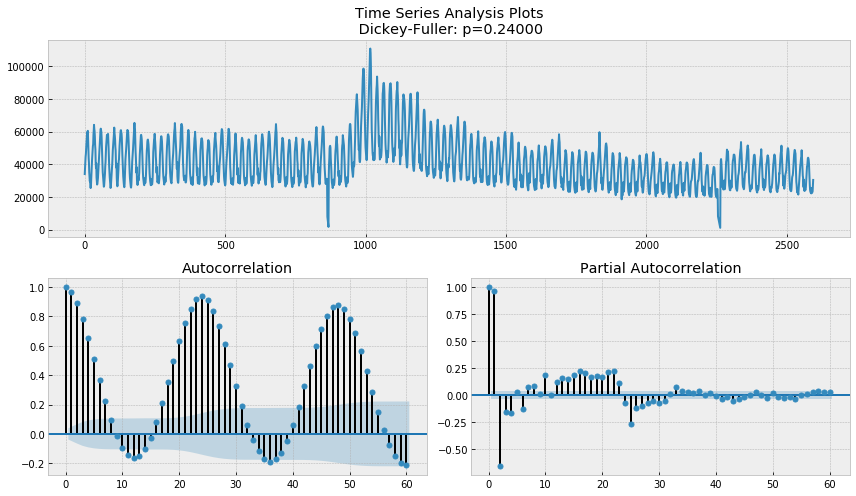

In [43]:
tsplot(train_df['y'], lags=60)

Dickey-Fuller Test: p=0.240004


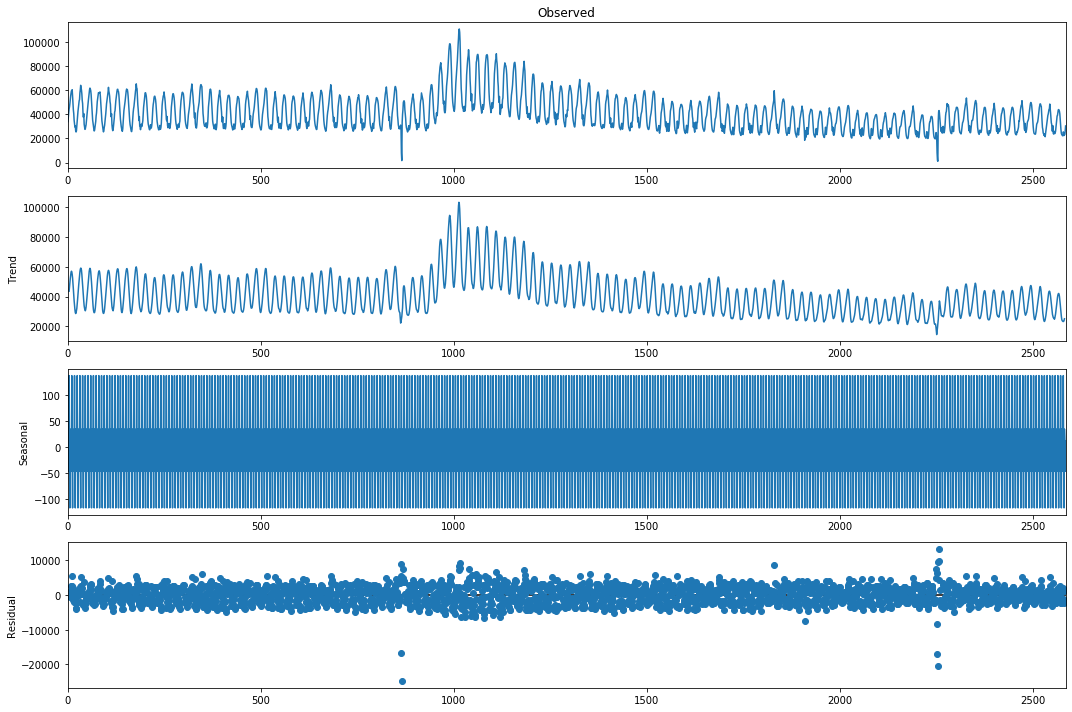

In [25]:
# You code here
sm.tsa.seasonal_decompose(train_df['y'].values, freq=7).plot();
print("Dickey-Fuller Test: p=%f" % sm.tsa.stattools.adfuller(train_df['y'])[1])

**Next, we turn to the construction of the SARIMAX model (`sm.tsa.statespace.SARIMAX`).<br> 
### <font color='red'>Question 5:</font> Best hyperparameters before Box-Cox transformation?

Try 1st and 2nd diff.

What parameters are the best for the model according to the `AIC` criterion?

Choose one option:

- p = 3, d = 0, q = 2, P = 2, D = 1, Q = 1
- p = 3, d = 1, q = 6, P = 2, D = 1, Q = 1
- p = 5, d = 1, q = 6, P = 1, D = 0, Q = 1 ********
- p = 7, d = 0, q = 7, P = 2, D = 2, Q = 2

In [31]:
# You code here
p = range(3, 9, 2)
d = range(0, 2)
q = [2, 6, 7]
P = range(1, 3)
D = range(0, 3)
Q = range(1, 3)

# creating list with all the possible combinations of parameters
from itertools import product

parameters = product(p, d, q, P, D, Q)
parameters_list = list(parameters)
len(parameters_list)

216

In [34]:
def optimizeSARIMA(parameters_list, data):
    """
        Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order in ARIMA model
        D - seasonal integration order 
        s - length of season
    """
    
    results = []
    best_aic = float("inf")

    for param in tqdm_notebook(parameters_list):
        # we need try-except because on some combinations model fails to converge
        try:
            model=sm.tsa.statespace.SARIMAX(data
, order=(param[0], param[1], param[2]), 
                                            seasonal_order=(param[3], param[4], param[5], 7)).fit(disp=-1)
        except:
            continue
        aic = model.aic
        # saving best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    # sorting in ascending order, the lower AIC is - the better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table

In [37]:
%%time
result_table = optimizeSARIMA(parameters_list, train_df['y'])


CPU times: user 2h 8min 43s, sys: 3.76 s, total: 2h 8min 46s
Wall time: 55min 39s


In [39]:
result_table.head()

,parameters,aic
0,"(5, 1, 6, 1, 0, 1)",47587.598785
1,"(5, 1, 6, 1, 0, 2)",47624.816841
2,"(3, 1, 6, 2, 0, 2)",47652.474279
3,"(5, 0, 6, 1, 0, 2)",47709.241239
4,"(5, 0, 2, 2, 0, 2)",47763.491162


**Next, we turn to the construction of the SARIMAX model (`sm.tsa.statespace.SARIMAX`).<br> 
### <font color='red'>Question 6:</font> Best hyperparameters after Box-Cox transformation?

Now do the same as in Question 5, but with Box-Cox transformation.

What is the optimal Box-Cox transformation parameter?

- Type answer here: **0.246704**

What parameters are the best for the model according to the `AIC` criterion?

Choose on option:

- p = 3, d = 0, q = 2, P = 2, D = 1, Q = 1
- p = 3, d = 1, q = 6, P = 2, D = 1, Q = 2 ****
- p = 5, d = 1, q = 6, P = 1, D = 0, Q = 1
- p = 7, d = 0, q = 7, P = 2, D = 2, Q = 2


Now do the same, but for the series with Box-Cox transformation.

In [46]:
# You code here
import scipy.stats
train_df['y_box'], lmbda = scipy.stats.boxcox(train_df['y']) 
print("The optimal Box-Cox transformation parameter: %f" % lmbda)

The optimal Box-Cox transformation parameter: 0.246704


In [47]:
%%time
result_table = optimizeSARIMA(parameters_list, train_df['y_box'])


CPU times: user 2h 1min 23s, sys: 12 s, total: 2h 1min 35s
Wall time: 49min 9s


In [48]:
result_table.head()

,parameters,aic
0,"(3, 1, 6, 2, 1, 2)",8107.392057
1,"(3, 1, 6, 1, 1, 1)",8112.074786
2,"(3, 1, 6, 2, 1, 1)",8114.208741
3,"(3, 1, 6, 1, 1, 2)",8131.187318
4,"(3, 1, 6, 1, 0, 1)",8217.362384


In [50]:
# set the parameters that give the lowest AIC
p, d, q, P, D, Q = result_table.parameters[0]

best_model=sm.tsa.statespace.SARIMAX(train_df['y_box'], order=(p, d, q), 
                                        seasonal_order=(P, D, Q, 7)).fit(disp=-1)
print(best_model.summary())

                                       SARIMAX Results                                        
Dep. Variable:                                  y_box   No. Observations:                 2586
Model:             SARIMAX(3, 1, 6)x(2, 1, [1, 2], 7)   Log Likelihood               -4039.696
Date:                                Tue, 26 May 2020   AIC                           8107.392
Time:                                        00:49:16   BIC                           8189.359
Sample:                                             0   HQIC                          8137.103
                                               - 2586                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9909      0.060     16.540      0.000       0.873       1.108
ar.

 
### <font color='red'>Question 7:</font> Draw final prediction and historical data

Don't forget to inverse Box-Cox...

In [51]:
# You code here
def inverse_boxcox(y, lambda_):
    return np.exp(y) if lambda_ == 0 else np.exp(np.log(lambda_ * y + 1) / lambda_)

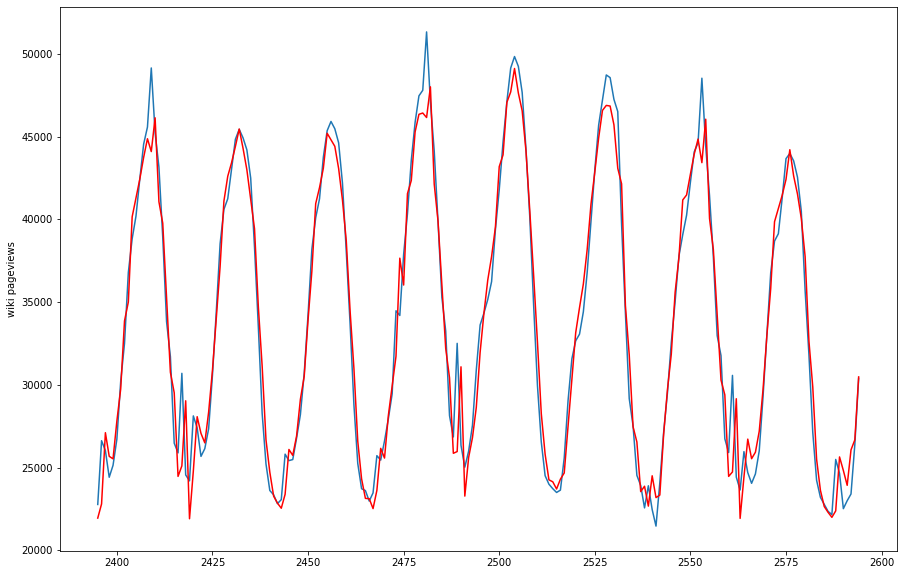

In [53]:
train_df['arima_model'] = inverse_boxcox(best_model.fittedvalues, lmbda)

train_df.y.tail(200).plot()
train_df.arima_model[13:].tail(200).plot(color='r')
plt.ylabel('wiki pageviews');